In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r'C:\Users\Proxy1\Downloads\archs\GlobalLandTemperaturesByCity.csv')

In [5]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [7]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [13]:
#filter the new york city data
city_data=data[data['City']=='New York'].copy()
city_data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
5203973,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
5203974,1743-12-01,NaN,NaN,New York,United States,40.99N,74.56W
5203975,1744-01-01,NaN,NaN,New York,United States,40.99N,74.56W
5203976,1744-02-01,NaN,NaN,New York,United States,40.99N,74.56W
5203977,1744-03-01,NaN,NaN,New York,United States,40.99N,74.56W
...,...,...,...,...,...,...,...
5207207,2013-05-01,15.544,0.281,New York,United States,40.99N,74.56W
5207208,2013-06-01,20.892,0.273,New York,United States,40.99N,74.56W
5207209,2013-07-01,24.722,0.279,New York,United States,40.99N,74.56W
5207210,2013-08-01,21.001,0.323,New York,United States,40.99N,74.56W


In [21]:
#convert 'dt' column to datetime format
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')
city_data['dt']

5203973   1743-11-01
5203974   1743-12-01
5203975   1744-01-01
5203976   1744-02-01
5203977   1744-03-01
             ...    
5207207   2013-05-01
5207208   2013-06-01
5207209   2013-07-01
5207210   2013-08-01
5207211   2013-09-01
Name: dt, Length: 3239, dtype: datetime64[ns]

In [25]:
#extract year and calculate mean temperature for each year
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
annual_avg_temp

,Year,AverageTemperature
0,1743,3.264000
1,1744,11.660375
2,1745,1.134500
3,1746,NaN
4,1747,NaN
...,...,...
266,2009,10.141833
267,2010,11.357583
268,2011,11.272250
269,2012,11.971500


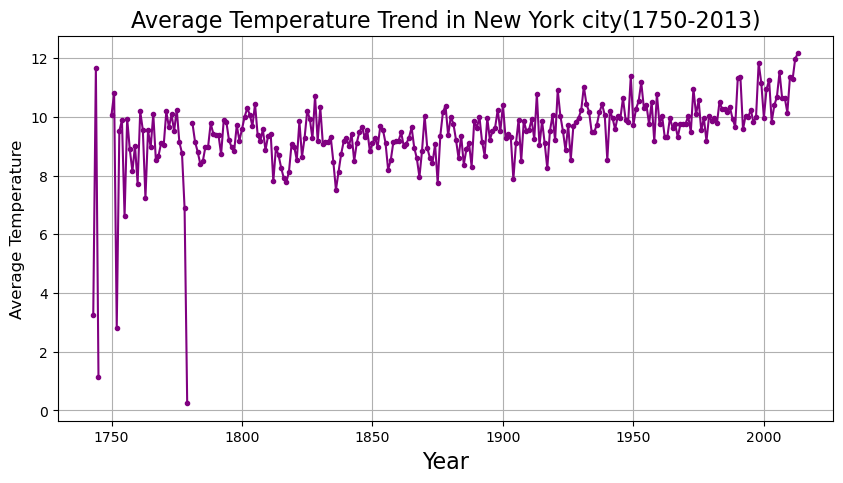

In [43]:
#line plot
plt.figure(figsize=(10,5))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],linestyle='-',marker='.',color='purple')
plt.title('Average Temperature Trend in New York city(1750-2013)',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Average Temperature',fontsize=12)
plt.grid(True)

In [ ]:
#Bar plot
question:which countries had the highest average temperatures in the dataset?
use case:compare categories or groups
example plot:
     x-axis:countries
     y-axis:Average temperature

In [81]:
#df=data['AverageTemperature'].head(10)
avg=data.groupby('Country')['AverageTemperature'].mean().reset_index().head(10)
avg
avg=avg.dropna()
top_countries=avg.sort_values(by='AverageTemperature',ascending=False).head(10)

Text(0, 0.5, 'AverageTemperature')

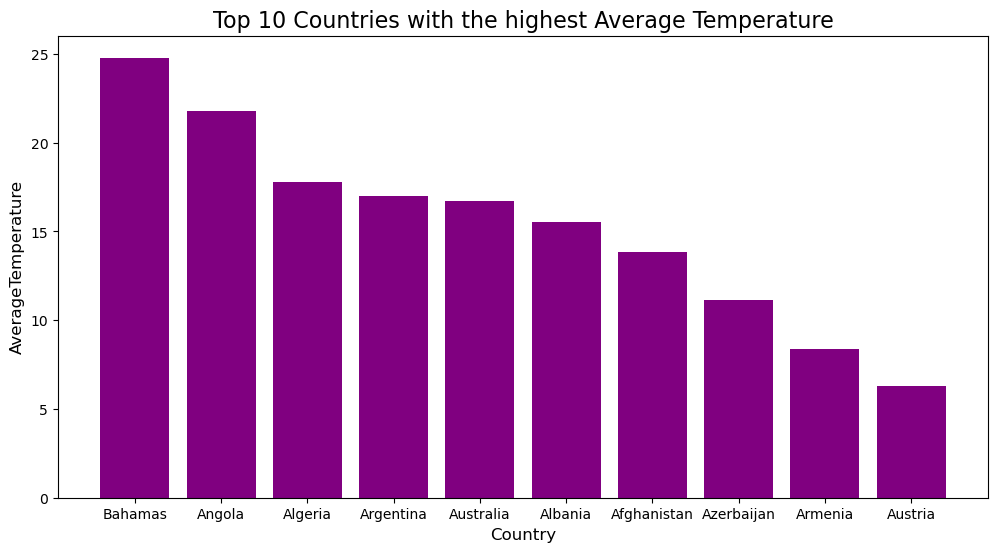

In [95]:
plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'],color='purple')
plt.title('Top 10 Countries with the highest Average Temperature',fontsize=16)
plt.xlabel('Country',fontsize=12)
plt.ylabel('AverageTemperature',fontsize=12)

In [ ]:
#histogram
question : what is the distribution of average temperature across all the data?
use case : understand the frequency of the values in a dataset
example plot:
    x-axis : Temperature Ranges
    y-axis : Frequency

In [119]:
temp_data=data['AverageTemperature'].dropna()

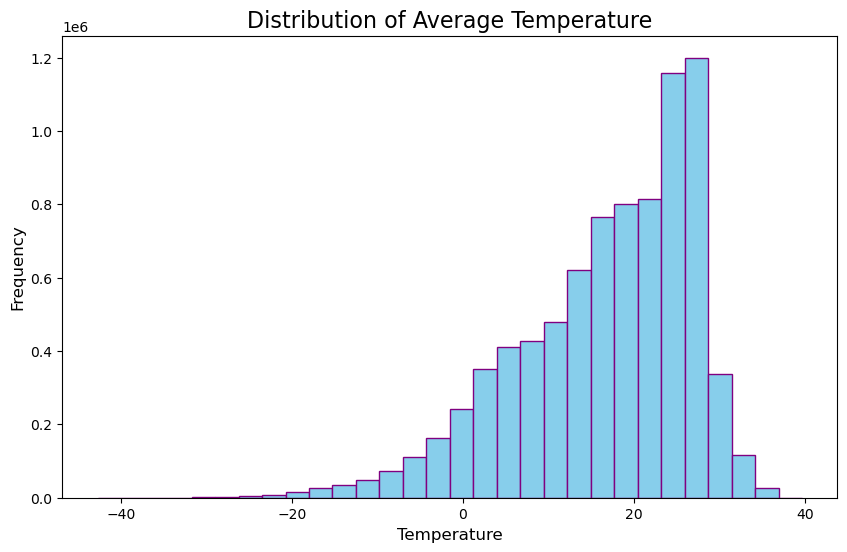

In [125]:
plt.figure(figsize=(10,6))
plt.hist(temp_data,bins=30,color='skyblue',edgecolor='purple')
plt.title('Distribution of Average Temperature',fontsize=16)
plt.xlabel('Temperature',fontsize=12)
plt.ylabel('Frequency',fontsize=12)

plt.show()

In [ ]:
#scatter plot
question : Is there a correlation between temperature and uncertainty in the dataset?
use case : explore the relationships between two continuous variables
example plot:
   x-axis:Average Temperature
   y-axis:Temperature Uncertainty

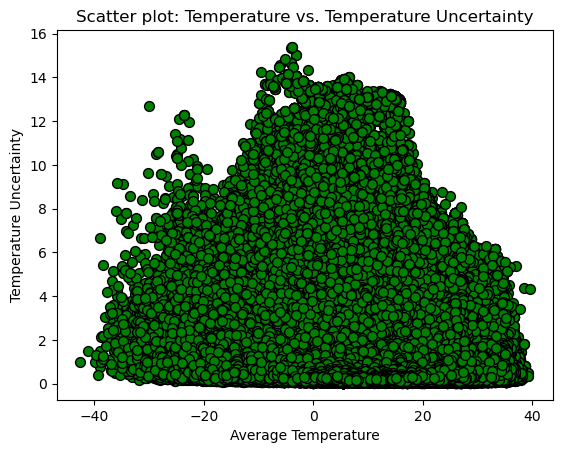

In [133]:
plt.scatter(data['AverageTemperature'],data['AverageTemperatureUncertainty'],color='green',s=50,edgecolor='black')
plt.title("Scatter plot: Temperature vs. Temperature Uncertainty")
plt.xlabel("Average Temperature")
plt.ylabel("Temperature Uncertainty")
plt.show()

In [ ]:
#Box plot
question : what is the spread of temperatures for a specific country over a given period?
Use case: Summarize data using quartiles,median,and outliers
example plot : 
    X-axis : Years or Countries
    Y-axis : Average Temperature

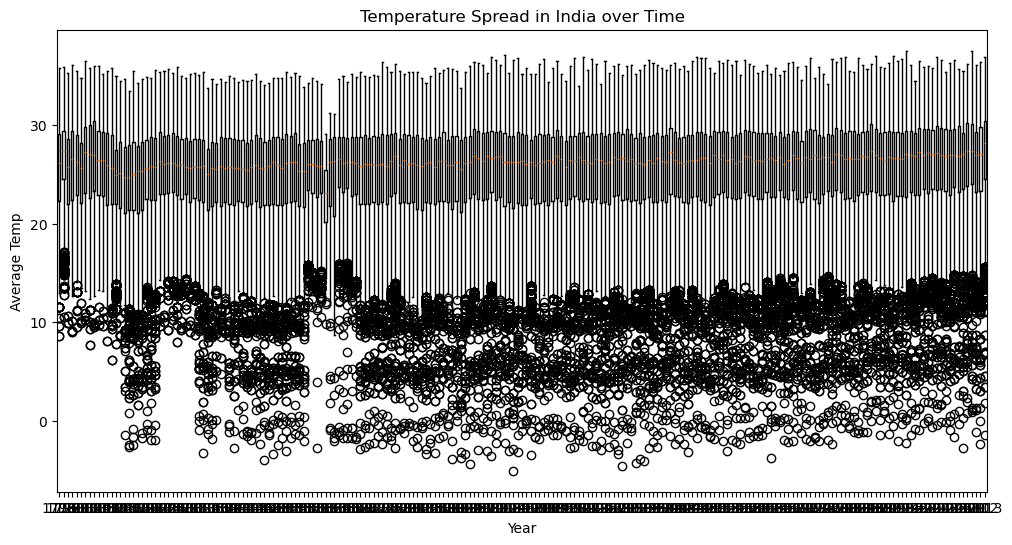

In [9]:
#BOX PLOT
country=data[data['Country']=='India'].copy()
country['dt']=pd.to_datetime(country['dt'],errors='coerce')
country=country.dropna(subset=['dt'])
country['Year']=country['dt'].dt.year
country=country[['Year','AverageTemperature']].dropna()
grouped_data=[group['AverageTemperature'] for _,group in country.groupby('Year')]
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data,tick_labels=sorted(country['Year'].unique()))
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.title("Temperature Spread in India over Time")
plt.show()